In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pathresults = "../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import matplotlib.ticker as mtick
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
df = pd.read_pickle("./cyl10to11_pdecsa.pkl") 
# get param set
paramsets =  pd.read_csv('../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yZ','cc','co']
column_names = outputvalsname + paramsets.columns.tolist()
paramsets.drop('theta',inplace=True, axis=1)

In [4]:
df['theta'] = df['wat']/df['vol']
df['depth']=-df['yZ']
df['q_co2']= df['co2']*df['vol']
outputvalsname =  ['vol','theta','depth','cs','cl','coa','cod','cca','ccd','css2','co2','cc','co']

In [ ]:
output1= sns.pairplot(df[outputvalsname], height=10, aspect=0.6)
output1.fig.set_size_inches(15,15)

In [ ]:
ax4 = output1#.fig
#ax4.map_offdiag(plt.scatter, color="ble")
#ax4.map_diag(plt.hist, color=tableau_20[2])
for i, j in zip(*np.triu_indices_from(ax4.axes, 1)):
    ax4.axes[i, j].set_visible(False)

In [ ]:
output1.map_upper(sns.scatterplot)

In [ ]:
output1.fig

In [ ]:
ax4.fig

In [ ]:
for ax in ax4.axes.flatten():
    xxtoto = ax.get_xticks()
    print(xxtoto)
    ax.xaxis.set_ticks(ticks = xxtoto.tolist(), labels, rotation=45)

In [ ]:
for ax in ax4.axes.flatten():
    # rotate x axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # ax.set_xlabel(ax.get_xlabel(), rotation = 0)
    # rotate y axis labels
    # ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    #ax.yaxis.get_label().set_horizontalalignment('right')

ax4.fig

In [ ]:
output1.fig.set_figheight(6)
output1.fig.set_figwidth(10)
plt.show()

In [ ]:

sns.pairplot(np.log10(df[outputvalsname]))
plt.show()

In [ ]:
df3 = df#[outputvalsname]
df3 = df3[df3['pSet'] != 74]
sns.pairplot((df3[outputvalsname]))
plt.show()

In [ ]:
unique_values = df['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

#subset = df[df['pSet']!=74]
plt.scatter(subset['cc'], subset['co'], alpha=0.3, 
            c = color_map[value])

# Add labels and legend
plt.xlabel('cc')
plt.ylabel('co')

plt.show()

In [ ]:
for uu in ['cc','co']:
    unique_values = df['pSet'].unique()
    rgb_values = sns.color_palette("Set2", 99)
    color_map = dict(zip(unique_values,rgb_values))

    for value in unique_values:
        subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
        plt.scatter(subset[uu]*subset['vol'], subset['q_co2'], alpha=0.3, 
                    c = color_map[value])

    # Add labels and legend
    plt.xlabel(uu)
    plt.ylabel('co2')

    plt.show()

In [ ]:
for uu in ['cca','coa']:
    unique_values = df['pSet'].unique()
    rgb_values = sns.color_palette("Set2", 99)
    color_map = dict(zip(unique_values,rgb_values))

    for value in unique_values:
        subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
        plt.scatter(subset[uu]*subset['vol'], subset['q_co2'], alpha=0.3, 
                    c = color_map[value])

    # Add labels and legend
    plt.xlabel(uu)
    plt.ylabel('co2')

    plt.show()

In [ ]:
unique_values = df['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cs']+subset['cl'], subset['co']+ subset['cc'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cs + cl')
plt.ylabel('co + cc')

plt.show()

In [ ]:
unique_values = df['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cs'],subset['cl'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cs')
plt.ylabel('cl')

plt.show()

In [ ]:
df.sort_values('cs',ascending = False)[['cs','pSet']].head()

In [ ]:
df['cscl'] = df['cs']+df['cl']

In [ ]:
df[(df['pSet'] == 74)|(df['pSet'] == 29)].sort_values('cscl',ascending = False)[['cscl','pSet','k_d,C']].head()

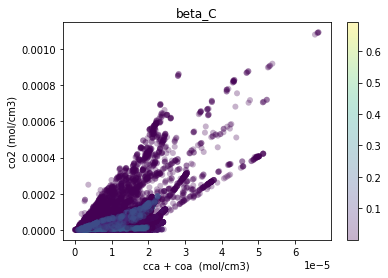

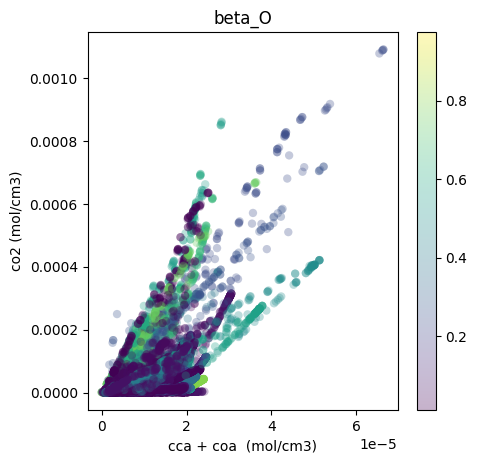

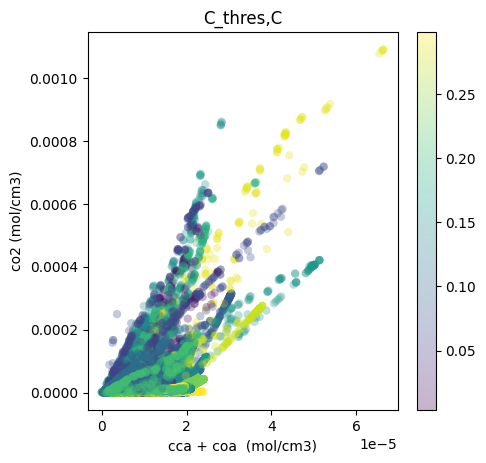

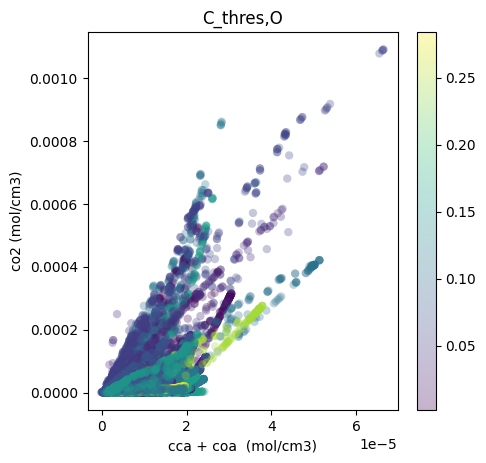

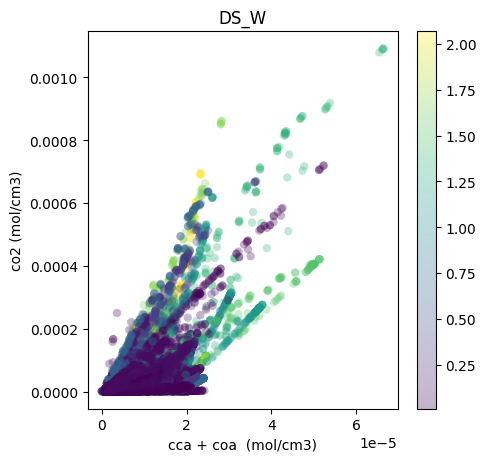

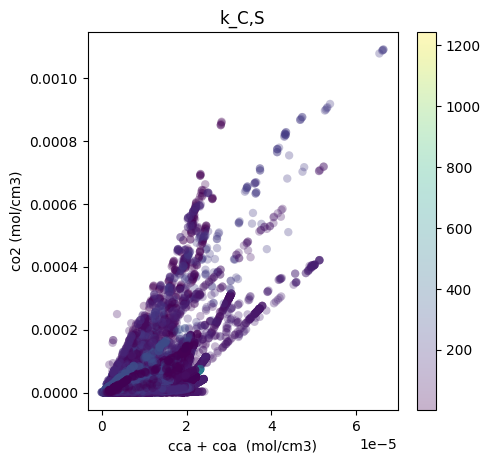

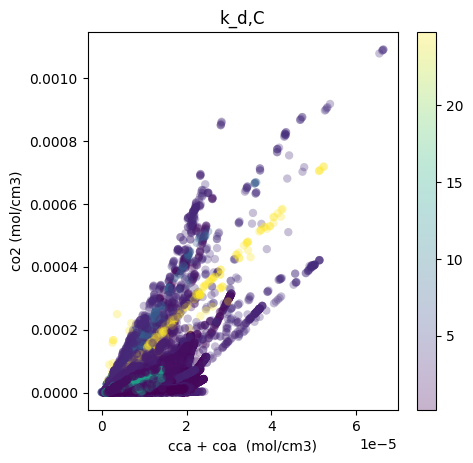

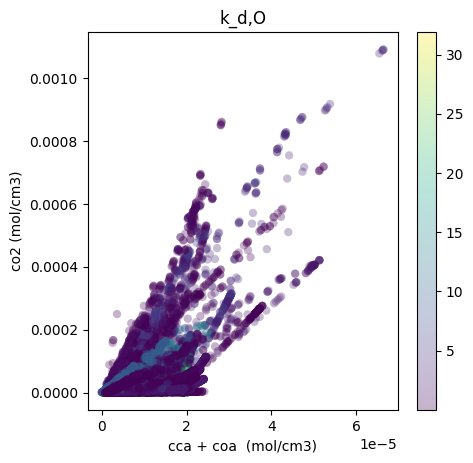

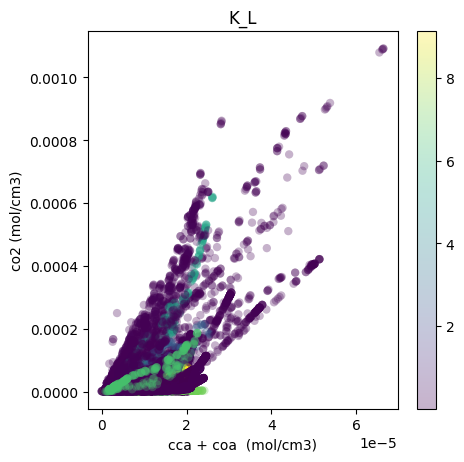

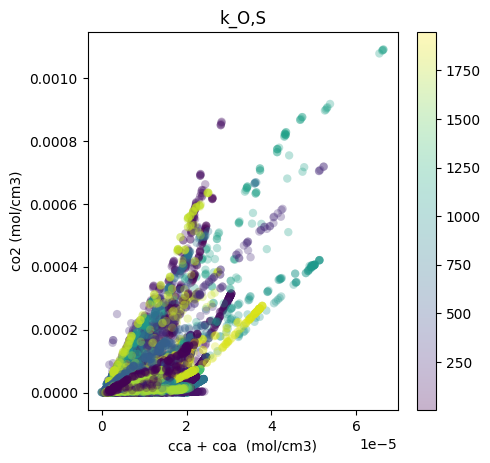

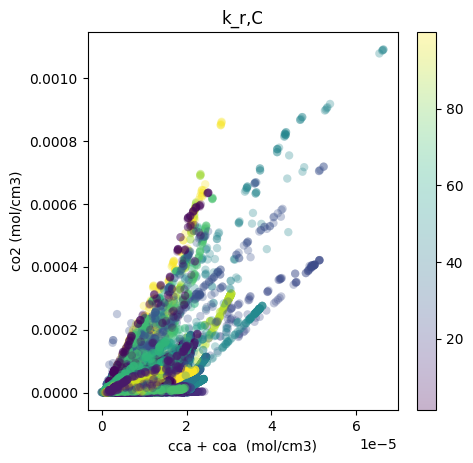

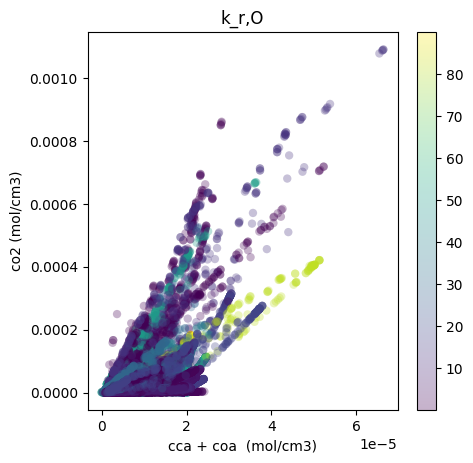

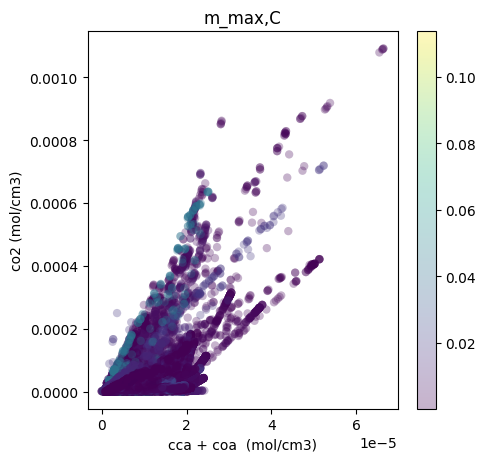

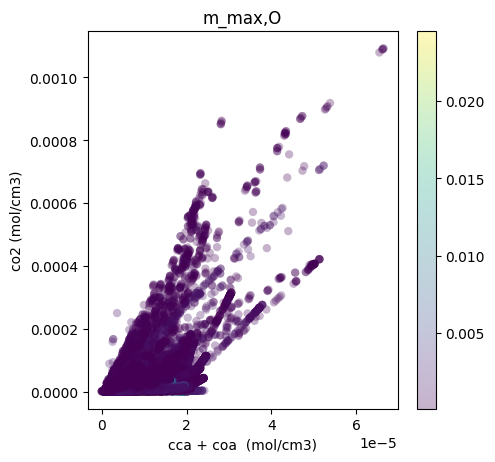

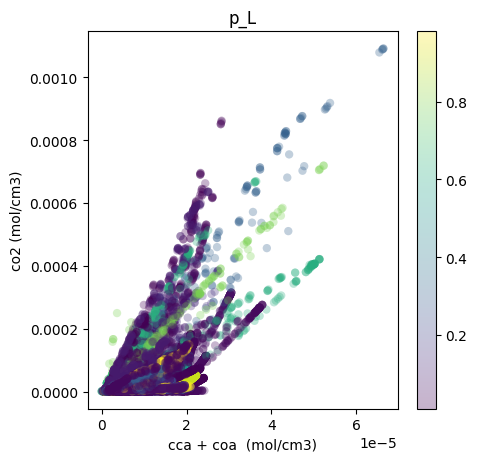

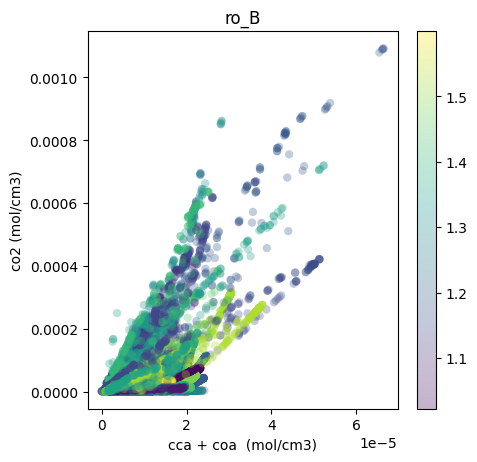

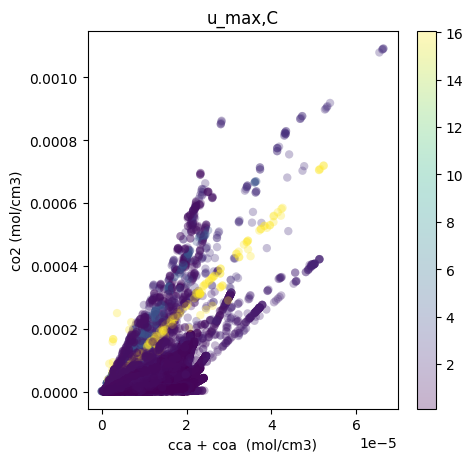

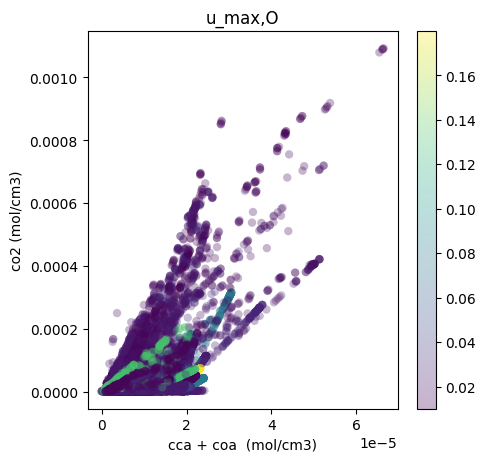

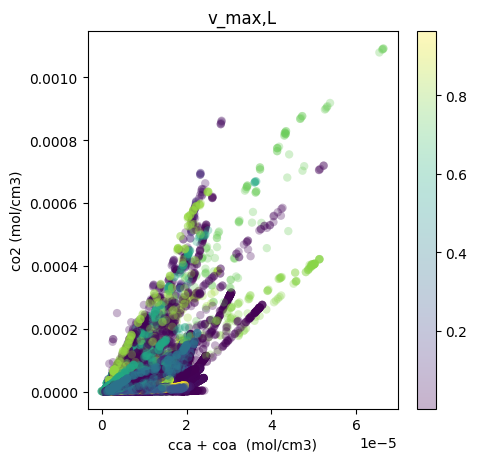

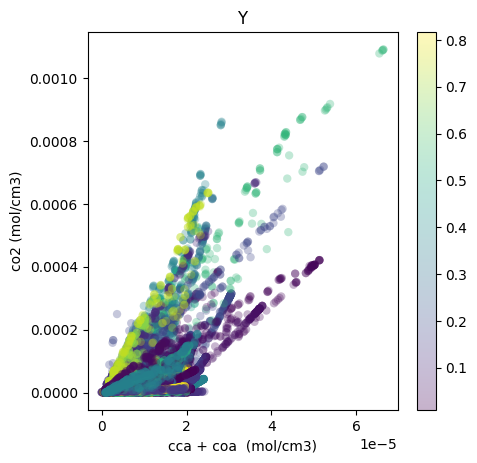

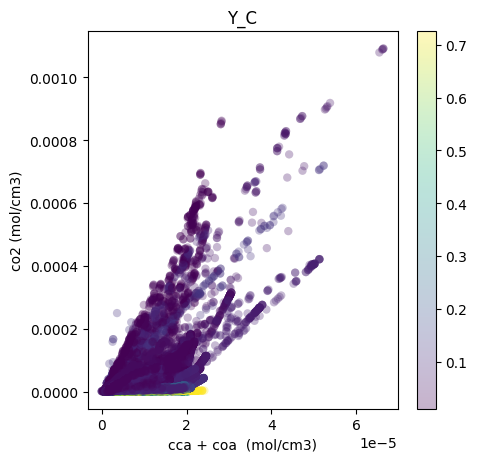

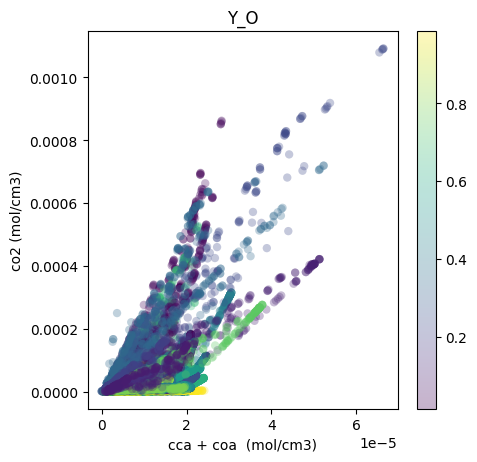

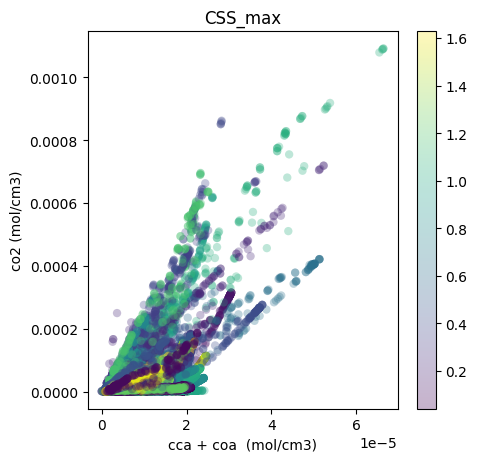

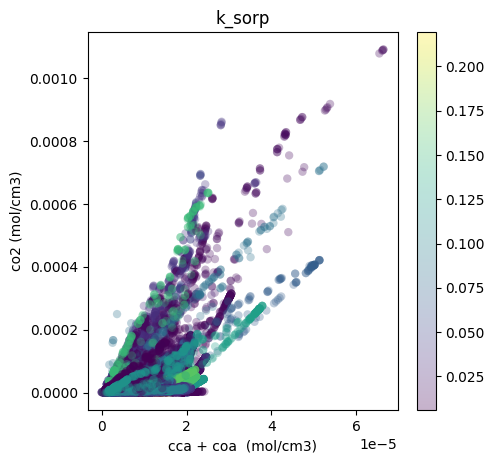

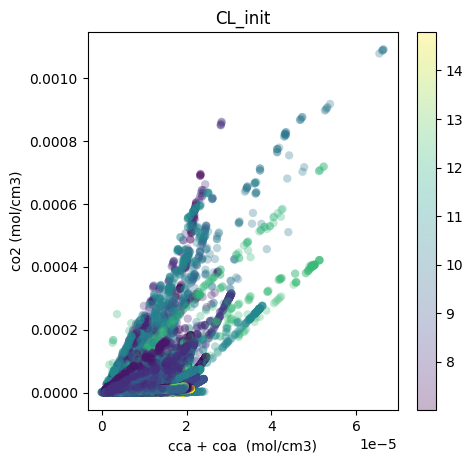

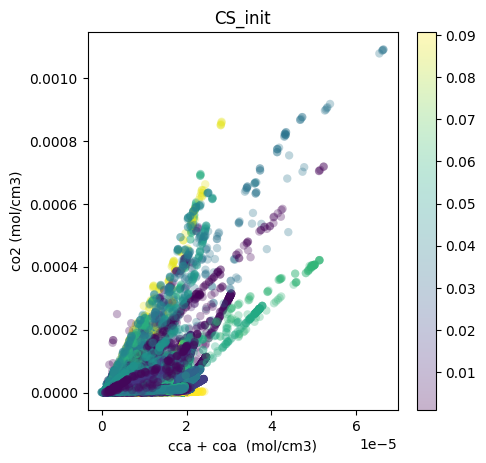

In [12]:
for nn in paramsets.columns.tolist():
    plt.scatter((df['coa']+df['cca']),(df['co2']), #np.log(df['cc']),np.log(df['co']), 
                c=df[nn],
                alpha=0.3, edgecolors ='none')
    
is5 = df2.loc[np.where(df2['pSet'] == 5)[0] ] # Select subset where 'pSet' equals the current value
plt.scatter(is5['pSet'], is5['simTime']/3600, alpha=1, 
            c = "black" ,zorder=100#color_map[value]
           )
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.xlabel('cca + coa  (mol/cm3)')
    plt.ylabel('co2 (mol/cm3)')
    plt.show()

In [ ]:
import matplotlib.cm as cm
for nn in paramsets.columns.tolist():
    plt.scatter((df['cs']+df['cl']),(df['co']+df['cc']), #np.log(df['cc']),np.log(df['co']), 
                c=df[nn],
                alpha=0.3, edgecolors ='none')
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('cs + cl (mol/cm3 water)')
    plt.ylabel('co + cc (mol/cm3 soil)')
    plt.show()

In [ ]:
import matplotlib.cm as cm
for nn in paramsets.columns.tolist():
    plt.scatter((df['cs']),(df['co']+df['cc']), #np.log(df['cc']),np.log(df['co']), 
                c=df[nn],
                alpha=0.3, edgecolors ='black')
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('cs (mol/cm3 water)')
    plt.ylabel('co + cc (mol/cm3 soil)')
    plt.show()

In [ ]:
df[df['pSet']== 74]#[['k_d,C','pSet','cscl']].sort_values('cscl')

In [ ]:
df[df['pSet']== 29][['k_d,C','pSet','cscl']].sort_values('cscl')

In [ ]:
for nn in paramsets.columns.tolist():
    plt.scatter(df['coa'],df['q_co2'], #np.log(df['cc']),np.log(df['co']), 
                c=df[nn],
                alpha=0.3, edgecolors ='none')
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.xlabel('coa (mol/cm3)')
    plt.ylabel('co2 (mol)')
    plt.show()

In [ ]:
for nn in paramsets.columns.tolist():
    plt.scatter(df['cc'],df['co2'], #np.log(df['cc']),np.log(df['co']), 
                c=df[nn],
                alpha=0.3, edgecolors ='none')
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.xticks(rotation=45)
    plt.xlabel('cc (mol/cm3)')
    plt.ylabel('co2 (mol/cm3)')
    plt.show()

In [ ]:
for nn in paramsets.columns.tolist():
    plt.scatter(df['co'],df['co2'], #*df['vol'] np.log(df['cc']),np.log(df['co']), 
                c=df[nn],
                alpha=0.3, edgecolors ='none')
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.xlabel('co (mol/cm3)')
    plt.ylabel('co2 (mol/cm3)')
    plt.show()

In [ ]:
for nn in paramsets.columns.tolist():
    plt.scatter(df['cs'],df['co2'], #np.log(df['cc']),np.log(df['co']), 
                c=df[nn],
                alpha=0.3, edgecolors ='none')
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.xlabel('cs (mol/cm3 water)')
    plt.ylabel('co2 (mol/cm3)')
    plt.show()

In [ ]:
for nn in paramsets.columns.tolist():
    plt.scatter(df['cs'],df['q_co2'], #np.log(df['cc']),np.log(df['co']), 
                c=df[nn],
                alpha=0.3, edgecolors ='none')
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    plt.title(nn)
    plt.colorbar()
    plt.xlabel('cs (mol/cm3)')
    plt.ylabel('co2 (mol)')
    plt.show()

In [ ]:
unique_values = df['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = df[df['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cs'],subset['co2'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cs')
plt.ylabel('co2')
plt.legend()
plt.show()

In [ ]:
outlierdataset = np.array([2, 5, 9, 11, 12, 13, 14, 15, 17, 20, 21, 25, 28, 29, 32, 36, 40,
       42, 44, 54, 57, 61, 64, 67, 71, 74, 77, 81, 84, 89, 90, 98],
      dtype=object)

In [ ]:
noDf = df[[iddset not in outlierdataset for iddset in df['pSet']]]

In [ ]:
unique_values = noDf['pSet'].unique()
rgb_values = sns.color_palette("Set2", 99)
color_map = dict(zip(unique_values,rgb_values))

for value in unique_values:
    subset = noDf[noDf['pSet'] == value]  # Select subset where 'pSet' equals the current value
    plt.scatter(subset['cs'],subset['co2'], alpha=0.3, 
                c = color_map[value])

# Add labels and legend
plt.xlabel('cs')
plt.ylabel('co2')
plt.legend()
plt.show()

In [8]:

is5 = df2.loc[np.where(df2['pSet'] == 5)[0] ]

In [9]:
print(is5['pSet'], is5['simTime'])

1186    5
1187    5
1188    5
1189    5
1190    5
       ..
1397    5
1398    5
1399    5
1400    5
1401    5
Name: pSet, Length: 216, dtype: object 1186    9925.08073
1187    9925.08073
1188    9925.08073
1189    9925.08073
1190    9925.08073
           ...    
1397    9925.08073
1398    9925.08073
1399    9925.08073
1400    9925.08073
1401    9925.08073
Name: simTime, Length: 216, dtype: float64


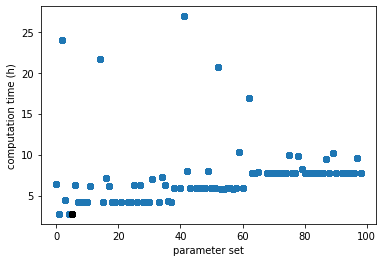

In [11]:
df2 = df[['pSet','simTime']].copy()
plt.scatter(df2['pSet'],df2['simTime']/3600, alpha=0.3)

is5 = df2.loc[np.where(df2['pSet'] == 5)[0] ] # Select subset where 'pSet' equals the current value
plt.scatter(is5['pSet'], is5['simTime']/3600, alpha=1, 
            c = "black" ,zorder=100#color_map[value]
           )
plt.xlabel('parameter set')
plt.ylabel('computation time (h)')
plt.show()

In [40]:
df2['simTime_h'] = df2['simTime']/3600

In [41]:
np.unique(df2[df2['simTime_h'] > 14]['pSet'])

array([2, 14, 41, 52, 62], dtype=object)

In [42]:
np.unique(df2[df2['simTime_h'] > 14]['pSet'])

array([2, 14, 41, 52, 62], dtype=object)

In [43]:
df2[df2['simTime_h'] > 14]

,pSet,simTime,simTime_h
472,2,86296.253904,23.971182
473,2,86296.253904,23.971182
474,2,86296.253904,23.971182
475,2,86296.253904,23.971182
476,2,86296.253904,23.971182
...,...,...,...
13031,62,60733.284456,16.870357
13032,62,60733.284456,16.870357
13033,62,60733.284456,16.870357
13034,62,60733.284456,16.870357


In [44]:
for psett in np.array([2, 14, 41, 52, 62], dtype=object):
    subset = df2[df2['pSet'] == psett]  
    print(psett,np.mean(subset['simTime_h']))

2 23.9711816399027
14 21.61773555305372
41 26.89482464485698
52 20.693473731335253
62 16.870356793306353
